In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv("nearest-earth-objects(1910-2024).CSV")

In [4]:
df.head().T

,0,1,2,3,4
neo_id,2162117,2349507,2455415,3132126,3557844
name,162117 (1998 SD15),349507 (2008 QY),455415 (2003 GA),(2002 PB),(2011 DW)
absolute_magnitude,19.14,18.5,21.45,20.63,22.7
estimated_diameter_min,0.394962,0.530341,0.136319,0.198863,0.076658
estimated_diameter_max,0.883161,1.185878,0.304818,0.444672,0.171412
orbiting_body,Earth,Earth,Earth,Earth,Earth
relative_velocity,71745.401048,109949.757148,24865.506798,78890.076805,56036.519484
miss_distance,58143623.31917,55801047.818199,67206887.722545,30396444.123282,63118626.507265
is_hazardous,False,True,False,False,False


In [5]:
df.tail().T

,338194,338195,338196,338197,338198
neo_id,54403809,54415298,54454871,54456245,54460573
name,(2023 VS4),(2023 XW5),(2024 KJ7),(2024 NE),(2024 NH3)
absolute_magnitude,28.58,28.69,21.919,23.887,22.951
estimated_diameter_min,0.005112,0.004859,0.109839,0.044377,0.06829
estimated_diameter_max,0.01143,0.010865,0.245607,0.099229,0.1527
orbiting_body,Earth,Earth,Earth,Earth,Earth
relative_velocity,56646.985988,21130.768947,11832.041031,56198.382733,42060.35783
miss_distance,64065481.152827,29488828.116393,53460784.471988,5184742.393793,7126682.457079
is_hazardous,False,False,False,False,False


In [6]:
df.shape

(338199, 9)

In [7]:
df.dtypes

neo_id                      int64
name                       object
absolute_magnitude        float64
estimated_diameter_min    float64
estimated_diameter_max    float64
orbiting_body              object
relative_velocity         float64
miss_distance             float64
is_hazardous                 bool
dtype: object

In [8]:
df.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381990e+05,338171.000000,338171.000000,338171.000000,338199.000000,3.381990e+05
mean,1.759939e+07,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.287225e+07,2.911216,0.313885,0.701869,26399.238435,2.077399e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30712.031471,2.494540e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47560.465474,4.332674e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.820614,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


In [9]:
import matplotlib.pyplot as plt

In [10]:
df_corr = df.drop(columns=["name","orbiting_body","neo_id"])
df_corr.corr()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
absolute_magnitude,1.000000,-0.594646,-0.594646,-0.345570,-0.213523,-0.343996
estimated_diameter_min,-0.594646,1.000000,1.000000,0.222434,0.111475,0.164841
estimated_diameter_max,-0.594646,1.000000,1.000000,0.222434,0.111475,0.164841
relative_velocity,-0.345570,0.222434,0.222434,1.000000,0.322587,0.187021
miss_distance,-0.213523,0.111475,0.111475,0.322587,1.000000,-0.006540
is_hazardous,-0.343996,0.164841,0.164841,0.187021,-0.006540,1.000000


In [11]:
df.isna().sum()

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [12]:
(df.isna().sum() * 100)/df.shape[0]

neo_id                    0.000000
name                      0.000000
absolute_magnitude        0.008279
estimated_diameter_min    0.008279
estimated_diameter_max    0.008279
orbiting_body             0.000000
relative_velocity         0.000000
miss_distance             0.000000
is_hazardous              0.000000
dtype: float64

In [13]:
df.duplicated().sum()

0

In [14]:
(df['neo_id'] == 3511355).value_counts()

neo_id
False    338173
True         26
Name: count, dtype: int64

# The nulls are
# 26 id :(3511355)
# 1 id: (54049909)
# 1 id: (3592397)

In [15]:
temp = df[df['absolute_magnitude'].isna()]
temp.index
df_new = df.drop(index=temp.index)

In [16]:
df_new.isna().sum()

neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64

Finding the outliers :

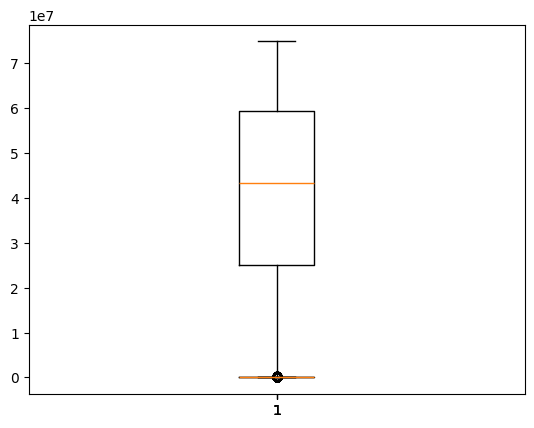

In [17]:
df_corr2 = df_corr.drop(columns='is_hazardous')
columns = df_corr2.columns
for col in columns:
    plt.boxplot(df_corr2[col])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b26417bad0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b264180410>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b26417b0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b264182790>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b2641832d0>],
 'means': []}

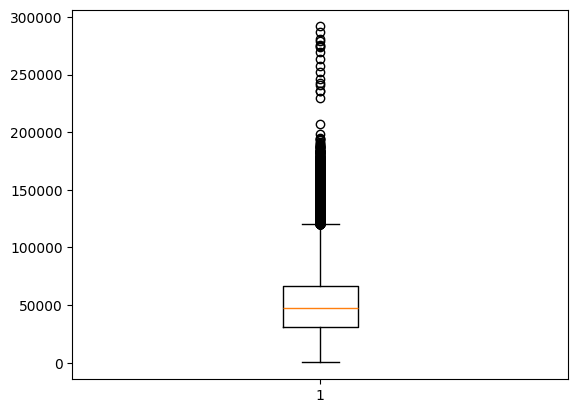

In [18]:
plt.boxplot(df_new["relative_velocity"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b2641ef350>,
 'caps': [<matplotlib.lines.Line2D at 0x1b2641f8a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b2641da550>],
 'medians': [<matplotlib.lines.Line2D at 0x1b2641fa150>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b2641fac90>],
 'means': []}

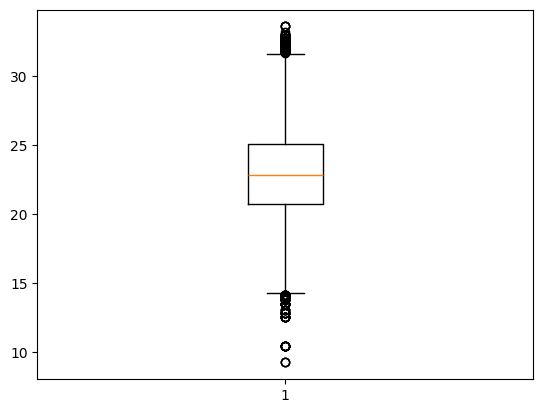

In [19]:
plt.boxplot(df_new["absolute_magnitude"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b264234b50>,
 'caps': [<matplotlib.lines.Line2D at 0x1b264256690>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b264254690>],
 'medians': [<matplotlib.lines.Line2D at 0x1b264257c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b264260750>],
 'means': []}

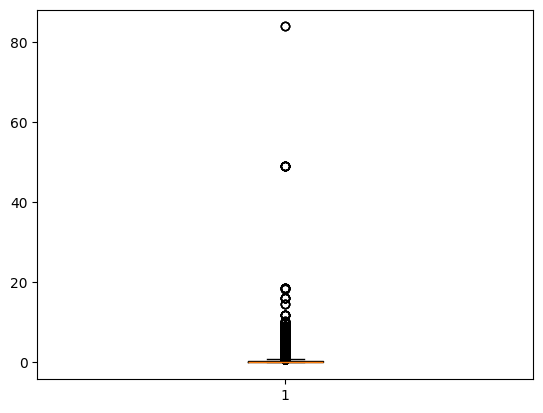

In [20]:
plt.boxplot(df_new["estimated_diameter_max"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b26795ad50>,
 'caps': [<matplotlib.lines.Line2D at 0x1b267971010>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b264262110>],
 'medians': [<matplotlib.lines.Line2D at 0x1b267972610>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b267973050>],
 'means': []}

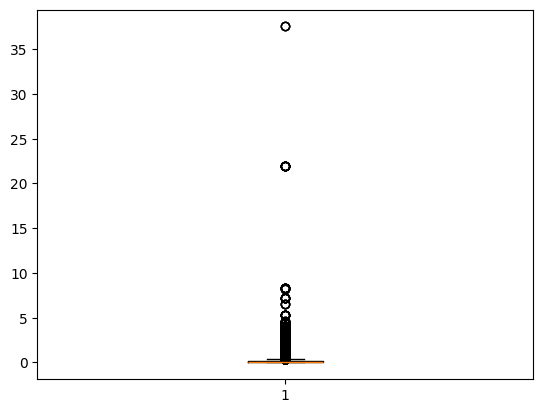

In [21]:
plt.boxplot(df_new["estimated_diameter_min"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b2679d6850>,
 'caps': [<matplotlib.lines.Line2D at 0x1b2679d7f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b2679d5cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b2679e9590>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b2679ea010>],
 'means': []}

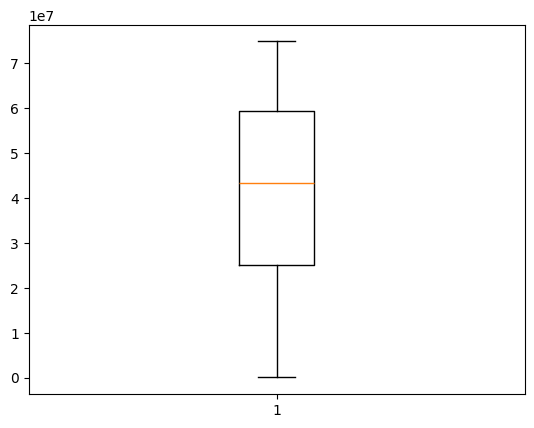

In [22]:
plt.boxplot(df_new["miss_distance"])

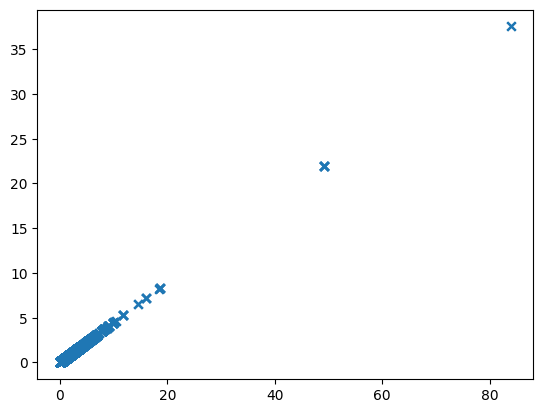

In [23]:
plt.scatter(df_new['estimated_diameter_max'],df_new['estimated_diameter_min'],marker= 'x')

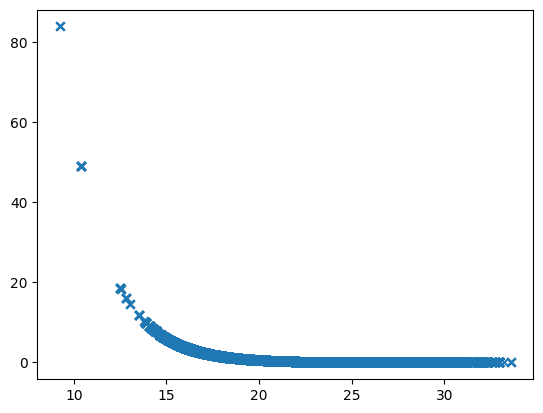

In [24]:
# estimated_diameter_min is same
plt.scatter(df_new['absolute_magnitude'],df_new['estimated_diameter_max'],marker= 'x')

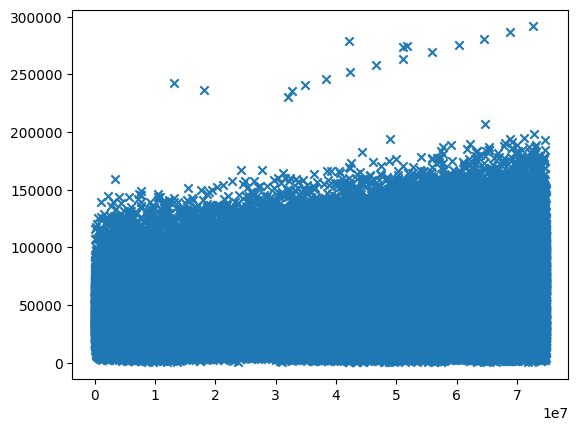

In [25]:
plt.scatter(df_new['miss_distance'],df_new['relative_velocity'],marker= 'x')

In [26]:
df_new.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381710e+05,338171.000000,338171.000000,338171.000000,338171.000000,3.381710e+05
mean,1.760041e+07,22.932525,0.157812,0.352878,51060.017994,4.153547e+07
std,2.287276e+07,2.911216,0.313885,0.701869,26399.922830,2.077411e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30710.626399,2.494495e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47557.046397,4.332724e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.223798,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


In [27]:
for col in columns:
    q1 = df_new[col].quantile(0.25)
    q3 = df_new[col].quantile(0.75)
    IQR = q3 - q1
    upper_limit = q3 + 1.5*IQR
    lower_limit = q1 - 1.5*IQR
    print( "the outliers for ",col , " The upper limit is : ",upper_limit," The lower limit is : ",lower_limit)


the outliers for  absolute_magnitude  The upper limit is :  31.640000000000008  The lower limit is :  14.199999999999994
the outliers for  estimated_diameter_min  The upper limit is :  0.43452582539999995  The lower limit is :  -0.2201015706
the outliers for  estimated_diameter_max  The upper limit is :  0.97162928355  The lower limit is :  -0.49216207365
the outliers for  relative_velocity  The upper limit is :  120617.1198958786  The lower limit is :  -23233.269699432836
the outliers for  miss_distance  The upper limit is :  110931585.25976005  The lower limit is :  -26647028.17966582


In [28]:
#the outliers for absolute_magnitude
df_new[(df_new["absolute_magnitude"] > 31.640000000000008)   | (df_new["absolute_magnitude"] < 14.199999999999994) ]

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
338,2000887,887 Alinda (A918 AA),13.88,4.451998,9.954971,Earth,24497.250026,4.795258e+07,False
1086,3892165,(2019 UN13),32.00,0.001058,0.002366,Earth,52253.106580,2.244544e+07,False
3444,3892165,(2019 UN13),32.00,0.001058,0.002366,Earth,38999.624151,4.630788e+06,False
4101,2002212,2212 Hephaistos (1978 SB),13.51,5.279040,11.804293,Earth,152450.609939,6.870373e+07,False
4206,2001036,1036 Ganymed (A924 UB),9.25,37.545248,83.953727,Earth,61537.325800,5.705108e+07,False
...,...,...,...,...,...,...,...,...,...
333053,3989456,(2020 CW),32.56,0.000818,0.001828,Earth,69659.313841,1.394139e+07,False
335432,3556206,(2011 CQ1),32.10,0.001011,0.002260,Earth,16649.325820,4.328877e+06,False
335797,54380194,(2023 RS),32.32,0.000913,0.002042,Earth,25506.946368,6.727844e+07,False
337017,3892775,(2019 VB5),31.70,0.001215,0.002717,Earth,22816.009735,2.983863e+06,False


In [29]:
#the outliers for estimated_diameter_min
df_new[(df_new["estimated_diameter_min"] > 0.43452582539999995  )   | (df_new["estimated_diameter_min"] < -0.2201015706) ]

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
13,2162635,162635 (2000 SS164),16.71,1.209358,2.704207,Earth,12703.788572,6.958943e+07,False
18,2284422,284422 (2006 YD),17.36,0.896510,2.004657,Earth,99804.739017,5.519530e+07,False
22,2052387,52387 Huitzilopochtli (1993 OM7),17.77,0.742258,1.659740,Earth,57915.566421,6.028892e+07,False
26,2408980,408980 (2002 RB126),18.71,0.481454,1.076564,Earth,81627.976782,3.776900e+07,False
...,...,...,...,...,...,...,...,...,...
338121,2413216,413216 (2003 MA),18.85,0.451393,1.009346,Earth,61749.492179,6.751558e+07,False
338149,2415029,415029 (2011 UL21),15.94,1.724070,3.855138,Earth,93176.009539,6.641212e+06,True
338169,2175921,175921 (2000 DM1),18.32,0.576176,1.288368,Earth,56806.498531,6.108673e+07,False
338170,2185851,185851 (2000 DP107),18.32,0.576176,1.288368,Earth,31245.887432,3.197571e+07,True


In [30]:
#the outliers for estimated_diameter_max
df_new[(df_new["estimated_diameter_max"] > 0.97162928355    )   | (df_new["estimated_diameter_max"] < -0.49216207365) ]

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
13,2162635,162635 (2000 SS164),16.71,1.209358,2.704207,Earth,12703.788572,6.958943e+07,False
18,2284422,284422 (2006 YD),17.36,0.896510,2.004657,Earth,99804.739017,5.519530e+07,False
22,2052387,52387 Huitzilopochtli (1993 OM7),17.77,0.742258,1.659740,Earth,57915.566421,6.028892e+07,False
26,2408980,408980 (2002 RB126),18.71,0.481454,1.076564,Earth,81627.976782,3.776900e+07,False
...,...,...,...,...,...,...,...,...,...
338121,2413216,413216 (2003 MA),18.85,0.451393,1.009346,Earth,61749.492179,6.751558e+07,False
338149,2415029,415029 (2011 UL21),15.94,1.724070,3.855138,Earth,93176.009539,6.641212e+06,True
338169,2175921,175921 (2000 DM1),18.32,0.576176,1.288368,Earth,56806.498531,6.108673e+07,False
338170,2185851,185851 (2000 DP107),18.32,0.576176,1.288368,Earth,31245.887432,3.197571e+07,True


Note : the outlires for each estimated_diameter_max & estimated_diameter_min are the same

In [31]:
#the outliers for relative_velocity
df_new[(df_new["relative_velocity"] > 120617.1198958786 )   | (df_new["relative_velocity"] < -23233.269699432836) ]

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
124,2434188,434188 (2003 AD23),19.090,0.404162,0.903733,Earth,139874.081716,5.526815e+07,True
133,3653602,(2013 VA10),22.310,0.091739,0.205135,Earth,151827.050327,7.158414e+07,False
139,3739078,(2015 YM10),19.830,0.287445,0.642747,Earth,129838.322602,4.309481e+07,False
203,54418268,(2023 YQ1),20.030,0.262153,0.586192,Earth,164228.326812,6.405915e+07,False
218,2386454,386454 (2008 XM),20.030,0.262153,0.586192,Earth,125128.919091,1.241808e+07,True
...,...,...,...,...,...,...,...,...,...
337663,3739621,(2016 AR130),20.440,0.217048,0.485333,Earth,125808.413901,7.147257e+07,False
337665,54017368,(2020 LD),22.400,0.088015,0.196807,Earth,124434.487475,3.675039e+07,False
337683,54448599,(2024 MH),19.331,0.361705,0.808798,Earth,150561.839319,4.314000e+07,False
337720,54200300,(2021 SN1),21.020,0.166171,0.371569,Earth,124449.114926,4.666045e+07,True


In [32]:
# the outliers for miss_distance
df_new[(df_new["miss_distance"] > 110931585.25976005)   | (df_new["miss_distance"] < -26647028.17966582) ]

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous


In [33]:
# sum_of_outliers for absolute_magnitude is 389 , for relative_velocity is 5448, for estimated_diameter_min & estimated_diameter_max is 26166 
persrntage_of_outliers_absolute_magnitude = (389 * 100) / df_new.shape[0]
persrntage_of_outliers_relative_velocity = (5448 * 100) / df_new.shape[0]
persrntage_of_outliers_estimated_diameter_max = (26166 * 100) / df_new.shape[0]
print("persrntage_of_outliers_absolute_magnitude is ",persrntage_of_outliers_absolute_magnitude)
print("persrntage_of_outliers_relative_velocity is ",persrntage_of_outliers_relative_velocity)
print("persrntage_of_outliers_estimated_diameter_max is ",persrntage_of_outliers_estimated_diameter_max)

persrntage_of_outliers_absolute_magnitude is  0.11503056146150911
persrntage_of_outliers_relative_velocity is  1.6110192772295673
persrntage_of_outliers_estimated_diameter_max is  7.7375055814957525


In [34]:
#droping the relative_velocity
remove_relative_velocity = df_new[(df_new["relative_velocity"] > 120617.1198958786 )   | (df_new["relative_velocity"] < -23233.269699432836) ]
indexes = remove_relative_velocity.index
df_temp_out_of_relative_velocity = df_new.drop(index= indexes)
df_temp_out_of_relative_velocity

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.140,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.500,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.450,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.630,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.700,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False
...,...,...,...,...,...,...,...,...,...
338194,54403809,(2023 VS4),28.580,0.005112,0.011430,Earth,56646.985988,6.406548e+07,False
338195,54415298,(2023 XW5),28.690,0.004859,0.010865,Earth,21130.768947,2.948883e+07,False
338196,54454871,(2024 KJ7),21.919,0.109839,0.245607,Earth,11832.041031,5.346078e+07,False
338197,54456245,(2024 NE),23.887,0.044377,0.099229,Earth,56198.382733,5.184742e+06,False


In [35]:
#droping the outliers of relative_velocity
indexes = (df_temp_out_of_relative_velocity[(df_temp_out_of_relative_velocity["absolute_magnitude"] > 31.640000000000008)   | (df_temp_out_of_relative_velocity["absolute_magnitude"] < 14.199999999999994)]).index
df_temp_remain_estimated_diameter = df_temp_out_of_relative_velocity.drop(index = indexes)
df_temp_remain_estimated_diameter

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.140,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.500,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.450,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.630,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.700,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False
...,...,...,...,...,...,...,...,...,...
338194,54403809,(2023 VS4),28.580,0.005112,0.011430,Earth,56646.985988,6.406548e+07,False
338195,54415298,(2023 XW5),28.690,0.004859,0.010865,Earth,21130.768947,2.948883e+07,False
338196,54454871,(2024 KJ7),21.919,0.109839,0.245607,Earth,11832.041031,5.346078e+07,False
338197,54456245,(2024 NE),23.887,0.044377,0.099229,Earth,56198.382733,5.184742e+06,False


In [36]:
#droping the outliers of estimated_diameter
indexes = (df_temp_remain_estimated_diameter[(df_temp_remain_estimated_diameter["estimated_diameter_max"] > 0.97162928355    )   | (df_temp_remain_estimated_diameter["estimated_diameter_max"] < -0.49216207365) ]).index
df_clear = df_temp_remain_estimated_diameter.drop(index = indexes)
df_clear

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.140,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
2,2455415,455415 (2003 GA),21.450,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.630,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.700,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False
5,3656926,(2014 BT8),25.000,0.026580,0.059435,Earth,47477.649832,4.290521e+07,False
...,...,...,...,...,...,...,...,...,...
338194,54403809,(2023 VS4),28.580,0.005112,0.011430,Earth,56646.985988,6.406548e+07,False
338195,54415298,(2023 XW5),28.690,0.004859,0.010865,Earth,21130.768947,2.948883e+07,False
338196,54454871,(2024 KJ7),21.919,0.109839,0.245607,Earth,11832.041031,5.346078e+07,False
338197,54456245,(2024 NE),23.887,0.044377,0.099229,Earth,56198.382733,5.184742e+06,False


In [37]:
#dropping the unnecessary features
df_clear = df_clear.drop(columns= ["neo_id","name","estimated_diameter_min","orbiting_body"])
df_clear


,absolute_magnitude,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.140,0.883161,71745.401048,5.814362e+07,False
2,21.450,0.304818,24865.506798,6.720689e+07,False
3,20.630,0.444672,78890.076805,3.039644e+07,False
4,22.700,0.171412,56036.519484,6.311863e+07,False
5,25.000,0.059435,47477.649832,4.290521e+07,False
...,...,...,...,...,...
338194,28.580,0.011430,56646.985988,6.406548e+07,False
338195,28.690,0.010865,21130.768947,2.948883e+07,False
338196,21.919,0.245607,11832.041031,5.346078e+07,False
338197,23.887,0.099229,56198.382733,5.184742e+06,False


In [38]:
df_clear["is_hazardous"].value_counts()

is_hazardous
False    272862
True      35356
Name: count, dtype: int64

In [39]:
#encoding the is_hazardous column
df_test = df_clear
df_test["is_hazardous"] = df["is_hazardous"]*1
df_test["is_hazardous"].value_counts()

is_hazardous
0    272862
1     35356
Name: count, dtype: int64

In [40]:
df_clear

,absolute_magnitude,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.140,0.883161,71745.401048,5.814362e+07,0
2,21.450,0.304818,24865.506798,6.720689e+07,0
3,20.630,0.444672,78890.076805,3.039644e+07,0
4,22.700,0.171412,56036.519484,6.311863e+07,0
5,25.000,0.059435,47477.649832,4.290521e+07,0
...,...,...,...,...,...
338194,28.580,0.011430,56646.985988,6.406548e+07,0
338195,28.690,0.010865,21130.768947,2.948883e+07,0
338196,21.919,0.245607,11832.041031,5.346078e+07,0
338197,23.887,0.099229,56198.382733,5.184742e+06,0


In [41]:
# scaling the feature that need to 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X = ["relative_velocity","miss_distance"]
df_clear[X] = scaler.fit_transform(df_clear[X])
df_clear


,absolute_magnitude,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.140,0.883161,0.985653,0.828646,0
2,21.450,0.304818,-0.999017,1.262586,0
3,20.630,0.444672,1.288124,-0.499859,0
4,22.700,0.171412,0.320614,1.066844,0
5,25.000,0.059435,-0.041727,0.099048,0
...,...,...,...,...,...
338194,28.580,0.011430,0.346458,1.112179,0
338195,28.690,0.010865,-1.157128,-0.543315,0
338196,21.919,0.245607,-1.550791,0.604437,0
338197,23.887,0.099229,0.327467,-1.706968,0


([<matplotlib.patches.Wedge at 0x1b20d589850>,
 [Text(-1.012764101326443, 0.4293120951760415, 'False'),
  Text(1.012764101326443, -0.42931209517604124, 'True')],
 [Text(-0.5524167825416961, 0.23417023373238627, '87.2%'),
  Text(0.5524167825416961, -0.2341702337323861, '12.8%')])

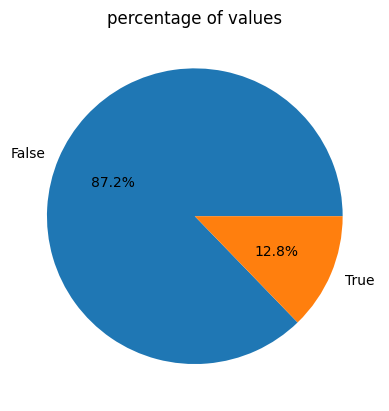

In [42]:
#handle the "is_hazardous" imbalanced
l = (df["is_hazardous"].value_counts()).keys()
v = (df["is_hazardous"].value_counts()).to_list()
plt.title("percentage of values")
plt.pie(v,labels= l ,autopct="%1.1f%%")

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
X = df_clear.drop("is_hazardous",axis = 1)
Y = df_clear["is_hazardous"]
smote = SMOTE(random_state=42)
x_resampled ,y_resampled = smote.fit_resample(X,Y)
df_resampled =pd.DataFrame(x_resampled,columns= X.columns)
df_resampled['is_hazardous'] = y_resampled
df_resampled["is_hazardous"].value_counts()


is_hazardous
0    272862
1    272862
Name: count, dtype: int64

Model Traning

In [45]:
df_resampled.corr()

,absolute_magnitude,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
absolute_magnitude,1.000000,-0.878018,-0.309810,-0.120680,-0.616565
estimated_diameter_max,-0.878018,1.000000,0.301411,0.099191,0.542454
relative_velocity,-0.309810,0.301411,1.000000,0.269762,0.266074
miss_distance,-0.120680,0.099191,0.269762,1.000000,-0.004935
is_hazardous,-0.616565,0.542454,0.266074,-0.004935,1.000000


In [46]:
#the correlation between is_hazardous and miss_distance is very low so I will drop it.
df_resampled = df_resampled.drop("miss_distance", axis = 1)
df_resampled

,absolute_magnitude,estimated_diameter_max,relative_velocity,is_hazardous
0,19.140000,0.883161,0.985653,0
1,21.450000,0.304818,-0.999017,0
2,20.630000,0.444672,1.288124,0
3,22.700000,0.171412,0.320614,0
4,25.000000,0.059435,-0.041727,0
...,...,...,...,...
545719,21.482908,0.300256,2.372282,1
545720,20.333218,0.509804,-0.137601,1
545721,20.060000,0.578149,0.648738,1
545722,20.952293,0.383375,0.000458,1


Decision tree.

In [47]:
#Decision tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

target_column = "is_hazardous"

#split the data into feature X & Y
X = df_resampled.drop(columns = target_column)
Y = df_resampled[target_column]
#split the data into traning sets and testing stes
x_train,x_test , y_train ,y_test = train_test_split(X,Y,test_size= 0.2,random_state= 42)
# Decision tree model
tree_model = DecisionTreeClassifier(random_state= 42)

#fit the model on the traning data
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [48]:
y_pred = tree_model.predict(x_test)

In [49]:
accurcy = accuracy_score(y_test,y_pred)
accurcy

0.9144440881396307

In [50]:
conf_matrix  = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test,y_pred)
print("confusion_matrix \n",conf_matrix)
print("classification_report \n",class_report)

confusion_matrix 
 [[49867  4788]
 [ 4550 49940]]
classification_report 
               precision    recall  f1-score   support

           0       0.92      0.91      0.91     54655
           1       0.91      0.92      0.91     54490

    accuracy                           0.91    109145
   macro avg       0.91      0.91      0.91    109145
weighted avg       0.91      0.91      0.91    109145



<Axes: title={'center': 'confusion_matrix'}>

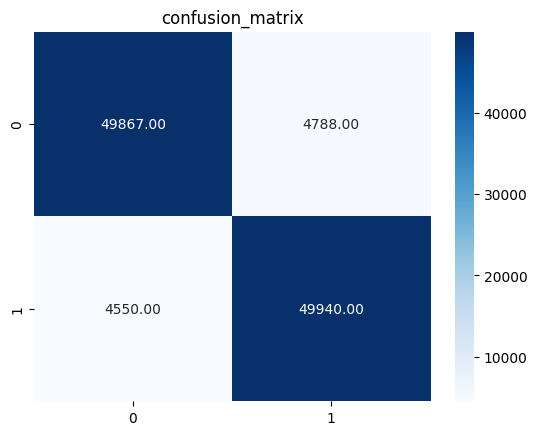

In [51]:
import seaborn as sns
cm = confusion_matrix(y_test,y_pred)
plt.xlabel("predicted")
plt.ylabel("True")
plt.title("confusion_matrix")
sns.heatmap(cm, annot = True,fmt='.2f',cmap="Blues")

Logistic Regression :

In [52]:
from sklearn.linear_model import LogisticRegression
x_train.shape

(436579, 3)

In [53]:
# create the module and train it.
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [54]:
y_pred = log_reg.predict(x_test)

In [55]:
#find the accurcy
accurcy = accuracy_score(y_test,y_pred)
accurcy

0.8496953593843053

In [56]:
conf_matrix  = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test,y_pred)
print("confusion_matrix \n",conf_matrix)
print("classification_report \n",class_report)

confusion_matrix 
 [[40249 14406]
 [ 1999 52491]]
classification_report 
               precision    recall  f1-score   support

           0       0.95      0.74      0.83     54655
           1       0.78      0.96      0.86     54490

    accuracy                           0.85    109145
   macro avg       0.87      0.85      0.85    109145
weighted avg       0.87      0.85      0.85    109145



<Axes: title={'center': 'confusion_matrix'}>

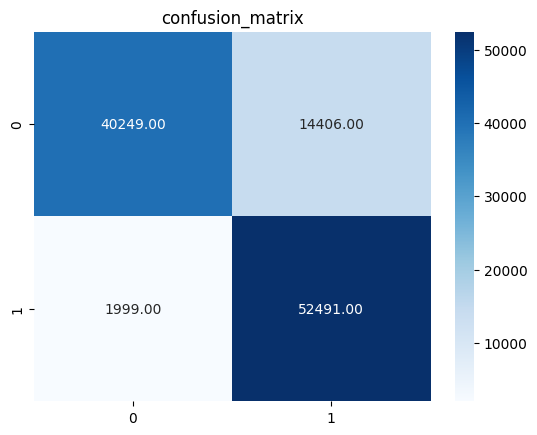

In [57]:
cm = confusion_matrix(y_test,y_pred)
plt.xlabel("predicted")
plt.ylabel("True")
plt.title("confusion_matrix")
sns.heatmap(cm, annot = True,fmt='.2f',cmap="Blues")